<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gen(n):
    val=np.zeros(n+1)
    x=np.zeros(n+1)
    for k in range(0,n+1):
        x[k]=1+k/n
        val[k]=m.log(x[k])
    return x, val
    
    
def Mon(n,k):
    (x,y)=Gen(n)
    pol=np.zeros(n+2)
    pol[0]=1
    l=1
    z=1
    for i in range(0,n+1):
        if i!=k:
            z=z*(x[k]-x[i])
    for i in range(0,n+1):
        if i!=k:
            for j in range(0,l+1):
                pol[l-j+1]=pol[l-j]
            pol[0]=0
            for j in range(0,l+1):
                pol[j]=pol[j]-x[i]*pol[j+1]
            l=l+1
    for i in range(0,l+1):
        pol[i]=pol[i]/z
    return pol
    
def Lag(n):
    (x,y)=Gen(n)
    p=np.zeros(n+2)
    for k in range(0,n+1):
        p=p+y[k]*Mon(n,k)
    return(p)

def NumLag(n, x0):
    p=Lag(n)
    s=0
    for i in range (0,n+2):
        s=s+x0**i*p[i]
    return(s)


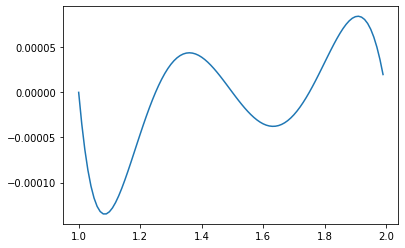

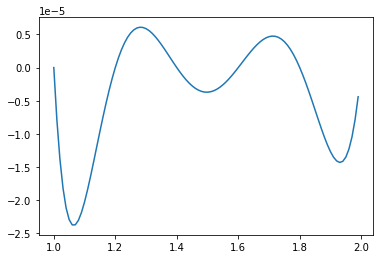

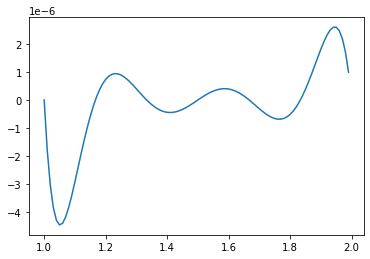

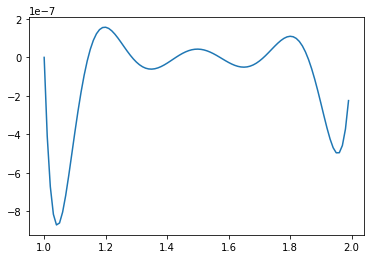

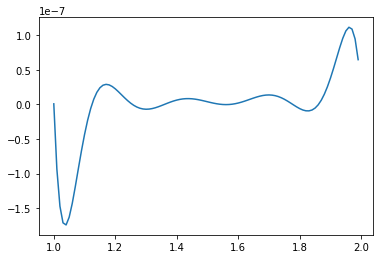

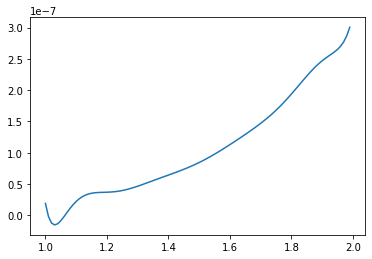

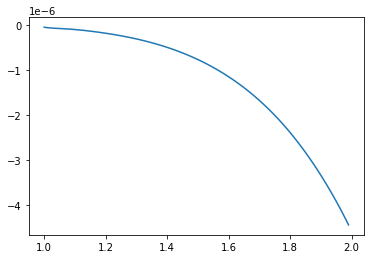

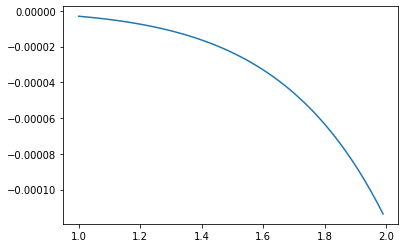

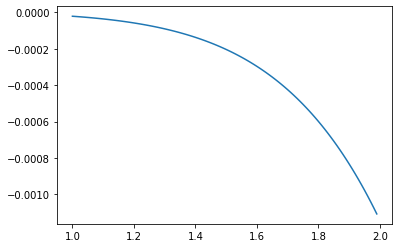

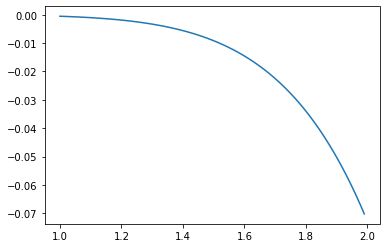

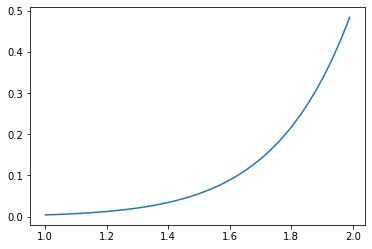

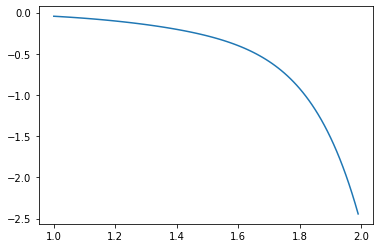

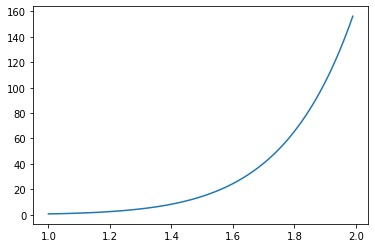

In [8]:
prec=100
for n in range (4,17):
    (x,y)=Gen(n)
    y1=np.zeros(n+1)
    p=Lag(n)
    for i in range(0,n+1):
        y1[i]=NumLag(n,x[i])
        #plt.scatter(x[i],y[i])

    arg=np.zeros(prec)
    f=np.zeros(prec)
    s=np.zeros(prec)
    diff=np.zeros(prec)
    for i in range(0,prec):
        arg[i]=1+i/prec
        f[i]=m.log(arg[i])
        for j in range (0,n+2):
            s[i]=s[i]+arg[i]**j*p[j]
        diff[i]=s[i]-f[i]
    plt.plot(arg,diff)
    plt.show()
#plt.plot(arg,f)
#plt.plot(arg,s)
#plt.show()